# Pandas 1
    Bailey Smtih
    October 14 2017

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

Creation of pandas `Series` where the index labels are the even integers $0,2,\ldots,100$ and the entries are the label squared minus one.
That is, the $n$th entry in the `Series` is $n^2 − 1$ and has label $n$.

In [2]:
mylist = np.arange(0,52,2)
mylist[mylist % 3 == 0] = 1
series1 = pd.Series([n**2-1 for n in mylist],index=np.arange(0,52,2))
series1

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64

Suppose you make an investment of $d$ dollars in a particularly volatile stock.
Every day the value of your stock goes up by \$$1$ with probability $p$, or down by \$$1$ with probability $1-p$ (this is an example of a _random walk_).

The following function  accepts a probability parameter $p$ and an initial amount of money $d$, defaulting to $100$.
Creates an index of the days from 1 January 2000 to 31 December 2000.
Simulates the daily change of the stock by making one draw from a Bernoulli distribution with parameter $p$ for each day.
Stores the draws in a pandas `Series` with the date index and set the first draw to the initial amount $d$.
Sums the entries cumulatively to get the stock value by day.
Sets any negative values to $0$, then plots the series.

In [3]:
def random_walk(p, initial_fund=100):
    days = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    w = np.ones(len(days))*initial_fund
    w[1:] = np.random.binomial(1, p, size=(len(days)-1,))*2-1
    w = pd.Series(w, index = days)
    w = w.cumsum() #random walk
    w[w<0] = 0
    w.plot(label="p = "+str(p)+ " d = "+str(initial_fund))
    plt.xlabel("Time (Days)")
    plt.ylabel("Total Money ($)")
    plt.title("Random Walk")
    plt.legend(loc='best')

Random walk observations

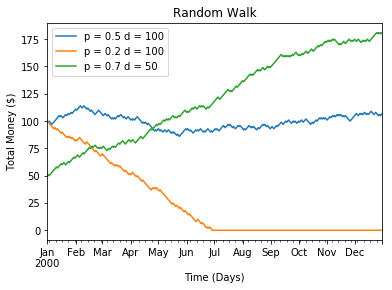

In [4]:
random_walk(.5)
random_walk(.2)
random_walk(.7, 50)

Use of pandas to perform the following SQL query on the ''tables'' constructed below.

`SELECT ID, Name from studentInfo WHERE Age > 19 AND Sex = 'M'`

In [5]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [6]:
studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] == 'M')][['ID','Name']]

,ID,Name
0,0,Mylan
6,6,Matt


Use of a join operation, create a DataFrame containing the ID, age, and GPA of all male individuals.

In [7]:
new_dataframe = pd.merge(studentInfo, otherInfo, on='ID')[studentInfo['Sex']=='M'][['ID','Age','GPA']]
new_dataframe

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4


The file `crime_data.csv` contains data on types of crimes committed in the United States from 1960 to 2016.
- Loaded the data into a pandas \li{DataFrame}, using the column names in the file and the column titled
`"Year"` as the index.
Skipped lines that don't contain data.
- Inserted a new column into the data frame that contains the crime rate by year\
- Ploted the crime rate as a function of the year.
- Listed the 5 years with the highest crime rate in descending order.
- Calculated the average number of total crimes as well as burglary crimes between 1960 and 2012.
- Found the years for which the total number of crimes was below average, but the number of burglaries
was above average.
- Plotted the number of murders as a function of the population.
- Selected the Population, Violent, and Robbery columns for all years in the 1980s, and saved
this smaller data frame to a CSV file `crime_subset.csv`.


In [8]:
filename = "crime_data.csv"
data = pd.read_csv(filename,index_col='Year') #Load data with "Year" as index
data.head()

,Population,Total,Violent,Property,Murder,Forcible Rape,Robbery,Aggravated Assault,Burglary,Larceny,Vehicle Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [9]:
data['Crime Rate'] = pd.Series(data['Total']/data['Population'],data.index)#Insert crime rate column

#### Graph of the Crime Rate

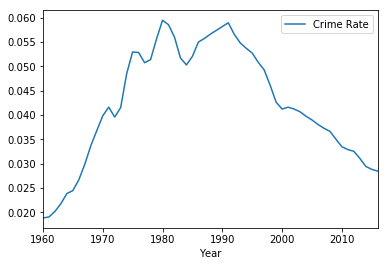

In [10]:
data.plot(y="Crime Rate")

#### 5 Highest Crime Years

In [11]:
highest_crime = data.nlargest(5,"Crime Rate").index
print(*highest_crime)

1980 1991 1981 1990 1989


#### Average Number of Total Crimes

In [12]:
average_total = data["Total"].mean()
print(average_total)

10553557.824561404


#### Average Number of Burglary Crimes

In [13]:
average_burglary = data["Burglary"].mean()
print(average_burglary)

2393104.596491228


#### Year with Low Crimes, High Burglary

In [14]:
low_crime = data[(data['Total'] < average_total) & (data['Burglary'] > average_burglary)].index
print(*low_crime)

1971 1973 1974


#### Plot of Murders against population

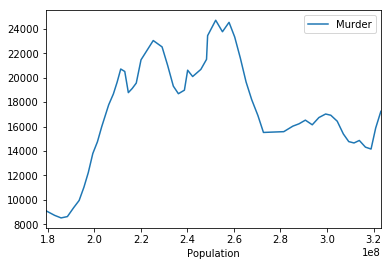

In [15]:
data.plot(x="Population",y="Murder")

In [16]:
low_crime = data[(data.index > 1979) & (data.index < 1990)][["Population","Violent","Robbery"]]
data.to_csv("crime_subset.csv")
low_crime

,Population,Violent,Robbery
Year,,,
1980,225349264,1344520,565840
1981,229146000,1361820,592910
1982,231534000,1322390,553130
1983,233981000,1258090,506570
1984,236158000,1273280,485010
1985,238740000,1328800,497870
1986,240132887,1489169,542775
1987,242282918,1483999,517704
1988,245807000,1566220,542970


In 1912 the RMS _Titanic_ sank after colliding with an iceberg.
The file `titanic.csv` contains data on the incident.
Each row represents a different passenger, and the columns describe various features of the passengers (age, sex, whether or not they survived, etc.)

Cleaed the data by:
- Reading the data into a `DataFrame`.
    Used the first row of the file as the column labels.
- Dropped the columns `"Sibsp"`, `"Parch"`, `"Cabin"`, `"Boat"`, `"Body"`, and `"home.dest"`.
- Dropped any entries without data in the `"Survived"` column, then changed the remaining entries to `True` or `False` (they start as 1 or 0).
- Replaced null entries in the `"Age"` column with the average age.
- Saved the new `DataFrame` as `titanic_clean.csv`.

Then, answerd the following questions:
- How many people survived? What percentage of passengers survived?
- What was the average price of a ticket? How much did the most expensive ticket cost?
- How old was the oldest survivor? How young was the youngest survivor? What about non-survivors?

In [3]:
titanic_data = pd.read_csv("titanic.csv")
titanic_data = titanic_data.drop(['Sibsp','Parch','Cabin','Boat','Body','home.dest'],1)

In [4]:
titanic_data.head()

,Pclass,Survived,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,S


In [5]:
titanic_data = titanic_data.dropna(subset=['Survived'])
titanic_data['Survived'] = titanic_data['Survived'].astype(bool)

In [16]:
titanic_data.head()

,Pclass,Survived,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,True,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,S
1,1.0,True,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,S
2,1.0,False,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,S
3,1.0,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,S
4,1.0,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,S


In [36]:
average_age = titanic_data['Age'].sum()/len(titanic_data['Age'].dropna())
titanic_data['Age'] = titanic_data['Age'].fillna(average_age)
titanic_data.head()

,Pclass,Survived,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,True,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,S
1,1.0,True,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,S
2,1.0,False,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,S
3,1.0,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,S
4,1.0,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,S


In [18]:
titanic_data.to_csv("titanic_clean.csv")

#### How many people survived?

In [43]:
survived = len(titanic_data['Survived'][titanic_data['Survived'] == True])
print(survived)

500


#### What percentage of passengers survived?

In [44]:
total = len(titanic_data['Survived'])
percentage = survived/total
print(percentage)

0.3819709702062643


#### What was the average price of a ticket?

In [34]:
sum_prices = titanic_data['Fare'].sum()
average = sum_prices/total
print(average)

33.270043468296564


#### How much did the most expensive ticket cost?

In [38]:
highest = titanic_data['Fare'].max()
print(highest)

512.3292


#### How old was the oldest survivor?

In [49]:
ages_survived = titanic_data[titanic_data['Survived'] == True]['Age']
print(ages_survived.max())

80.0


#### How young was the youngest survivor?

In [50]:
print(ages_survived.min())

0.1667


#### How old was the oldest non-survivor?

In [53]:
ages_died = titanic_data[titanic_data['Survived'] == False]['Age']
print(ages_died.max())

74.0


#### How young was the youngest non-survivor?

In [52]:
print(ages_died.min())

0.3333
